In [2]:
import pandas as pd
import numpy as np

## Get Error Terms

In [3]:
# Laod existing data
ticker_list = pd.read_csv('C:/Users/l5453/OneDrive/Documents/Projects/afp/list_snp500_subset.csv')
true_values = pd.read_csv('C:/Users/l5453/OneDrive/Documents/Projects/afp/yahoos/true_daily.csv')
rgbm_pred_values = pd.read_csv('C:/Users/l5453/GoogleDrive/GroupWorks/Term4-AFP/forecasts/Predictions/3ff/RLGBM_norm_daily_p1y.csv')
rr_pred_values = pd.read_csv('C:/Users/l5453/GoogleDrive/GroupWorks/Term4-AFP/forecasts/Predictions/3ff/RR_norm_p1y.csv')

# Set timestamp index
true_values = true_values.set_index('Date')
true_values.index = pd.to_datetime(true_values.index)
rgbm_pred_values = rgbm_pred_values.set_index('Date')
rgbm_pred_values.index = pd.to_datetime(rgbm_pred_values.index)
rr_pred_values = rr_pred_values.set_index('Date')
rr_pred_values.index = pd.to_datetime(rr_pred_values.index)
tickers = ticker_list['co_tic'].tolist()

# Sliced common tickers and calculate error terms
sliced_true = true_values[true_values.columns[true_values.columns.isin(tickers)]]
sliced_pred_gbm = rgbm_pred_values[rgbm_pred_values.columns[rgbm_pred_values.columns.isin(tickers)]]
common_tickers = sliced_pred_gbm.columns.intersection(sliced_true.columns)
errors = (sliced_true - sliced_pred_gbm)[common_tickers]

errors.to_csv('subset_error.csv')
sliced_true[common_tickers].to_csv('subset_true.csv')
rgbm_pred_values[common_tickers].to_csv('rgbm_pred.csv')
rr_pred_values[common_tickers].to_csv('rr_pred.csv')

There are there tickers not in my original ticker sets.

In [4]:
set(tickers).difference(common_tickers)

{'BF.B', 'LIN', 'PPG'}

## Check its composition

In total 196 stocks

In [5]:
# Laod meta data
meta = pd.read_csv('C:/Users/l5453/OneDrive/Documents/Projects/afp/yahoos/yahoo_metas.csv')

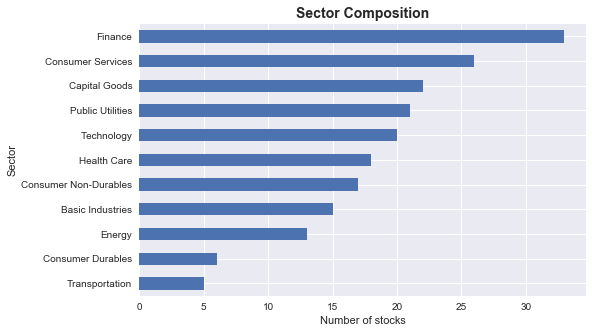

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('seaborn')

fig, ax = plt.subplots(1,1,figsize=(8,5))
meta[meta['tickers'].isin(common_tickers)].groupby('Sector').count()['Symbol'].sort_values().plot(ax=ax, kind='barh')
ax.set_title('Sector Composition', fontsize=14, fontweight=700)
ax.set_xlabel('Number of stocks')

fig.savefig('subset_sector_comp.pdf', bbox_inches='tight')

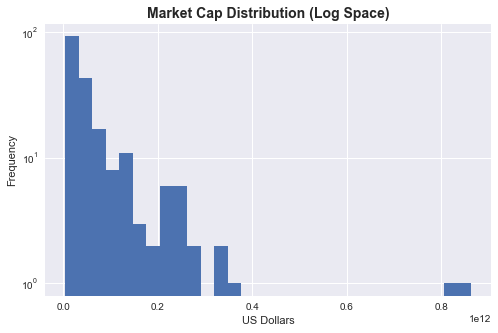

In [50]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

meta[meta['tickers'].isin(common_tickers)]['MarketCap'].hist(log=True, ax=ax, bins=30)
ax.set_title('Market Cap Distribution (Log Space)', fontsize=14, fontweight=700)
ax.set_xlabel('US Dollars')
ax.set_ylabel('Frequency')

fig.savefig('subset_mkt_cap.pdf', bbox_inches='tight')